In [1]:
import corner

import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import json
import time
import pytensor 
import pymc as pm
import arviz as az
import jax
import jax.numpy as jnp
import pyhf
import scipy.stats as sps
pyhf.set_backend('jax')

from jax import grad, jit, vmap, value_and_grad, random
from pytensor import tensor as pt
from pytensor.graph.basic import Apply
from pytensor.graph import Apply, Op

import sys
sys.path.insert(1, '/Users/malinhorstmann/Documents/pyhf_pymc/PredictiveChecks')
import external4

# Model

In [2]:
### Simple pyhf model
model = pyhf.Model(
    {'channels': [{'name': 'singlechannel',
    'samples': [
    {'name': 'signal',
     'data': [6, 6, 3],
     'modifiers': [
         {'name': 'mu', 'type': 'normfactor', 'data': None}]},

    {'name': 'background',
     'data': [55, 55, 55],''
     'modifiers': [
        ## Staterror / Normal
        {"name": "my_staterror","type": "staterror","data": [2.0, 2.0, 2.4],},
        ## Lumi / Normal
        {'name': 'lumi', 'type': 'lumi', 'data': None},
        ## Correlated / Normal
        {'name': 'corr_bkg', 'type': 'histosys','data': {'hi_data': [65, 56, 67], 'lo_data': [40, 40, 43]}},
        {'name': 'corr_bkg1', 'type': 'histosys','data': {'hi_data': [65, 65, 66], 'lo_data': [40, 40, 40]}},
        {'name': 'corr_bkg2', 'type': 'histosys','data': {'hi_data': [66, 65, 60], 'lo_data': [40, 40, 39]}},
        ## Uncorrelated / Poisson
        {'name': 'uncorr_bkg', 'type': 'shapesys','data': [7, 8, 7.17]},
        {'name': 'uncorr_bkg1', 'type': 'shapesys','data': [7, 8, 6.7]},
        {'name': 'uncorr_bkg2', 'type': 'shapesys','data': [7.27, 9, 7]},
        
         ]},    
                                 
    ]},
    ],
    "parameters": [
            {
                "name": "lumi",
                "auxdata": [1.0],
                "sigmas": [0.017],
                "bounds": [[0.915, 1.085]],
                "inits": [1.0],
            }
        ],}
)

nBins = len(model.expected_actualdata(model.config.suggested_init()))

### Observations
obs = model.expected_actualdata(model.config.suggested_init())

In [23]:
# with open('/Users/malinhorstmann/Documents/pyhf_pymc/PredictiveChecks/SRee_SRmm_Srem.json') as serialized:
with open('/Users/malinhorstmann/Documents/pyhf_pymc/PredictiveChecks/ttbar_ljets_xsec_inclusive_pruned.json') as serialized:
    spec = json.load(serialized)

workspace = pyhf.Workspace(spec)
model = workspace.model()
obs = workspace.data(model, include_auxdata=False)
nBins = len(model.expected_actualdata(model.config.suggested_init()))

# Sampling

In [24]:
unconstr_dict = {
    'uncon1': {'type': 'unconstrained', 'type2': 'normal', 'input': [[1], [0.1]]}
}

prior_dict = external4.prepare_priors(model, unconstr_dict)

prepared_model = external4.prepare_model(model=model, observations=obs, precision=0.10, priors=prior_dict)

post_dataT, post_predT, prior_predT = external4.sampling(prepared_model, 500)

/Users/malinhorstmann/Documents/pyhf_pymc/PredictiveChecks/external4.py:178: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if np.array(norm_mu).size != 0:


Sampling: [Normals, Unconstrained, main]


# DisplacedLeptons

/Users/malinhorstmann/anaconda3/envs/pyhf_pymc/lib/python3.9/site-packages/arviz/plots/plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (72) in plot_autocorr, generating only 40 plots
  warnings.warn(


array([[<AxesSubplot: title={'center': 'Unconstrained\n0, 0'}>,
        <AxesSubplot: title={'center': 'Unconstrained\n1, 0'}>,
        <AxesSubplot: title={'center': 'Unconstrained\n2, 0'}>,
        <AxesSubplot: title={'center': 'Unconstrained\n3, 0'}>],
       [<AxesSubplot: title={'center': 'Normals\n0, 0'}>,
        <AxesSubplot: title={'center': 'Normals\n0, 1'}>,
        <AxesSubplot: title={'center': 'Normals\n0, 2'}>,
        <AxesSubplot: title={'center': 'Normals\n0, 3'}>],
       [<AxesSubplot: title={'center': 'Normals\n0, 4'}>,
        <AxesSubplot: title={'center': 'Normals\n0, 5'}>,
        <AxesSubplot: title={'center': 'Normals\n0, 6'}>,
        <AxesSubplot: title={'center': 'Normals\n0, 7'}>],
       [<AxesSubplot: title={'center': 'Normals\n0, 8'}>,
        <AxesSubplot: title={'center': 'Normals\n0, 9'}>,
        <AxesSubplot: title={'center': 'Normals\n0, 10'}>,
        <AxesSubplot: title={'center': 'Normals\n0, 11'}>],
       [<AxesSubplot: title={'center': 'No

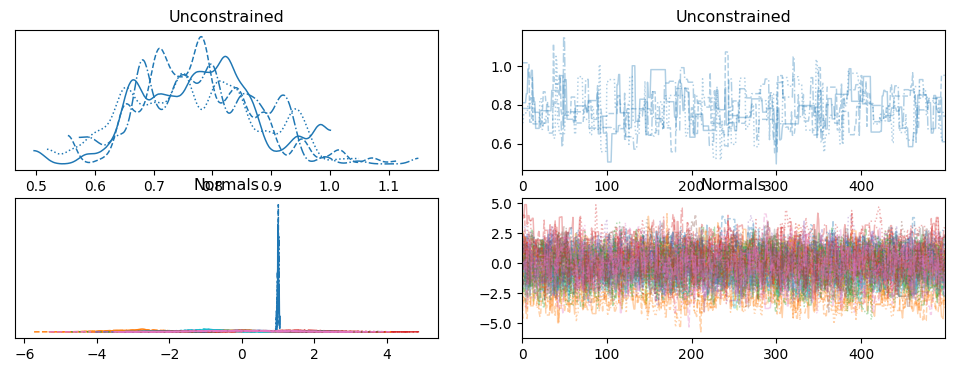

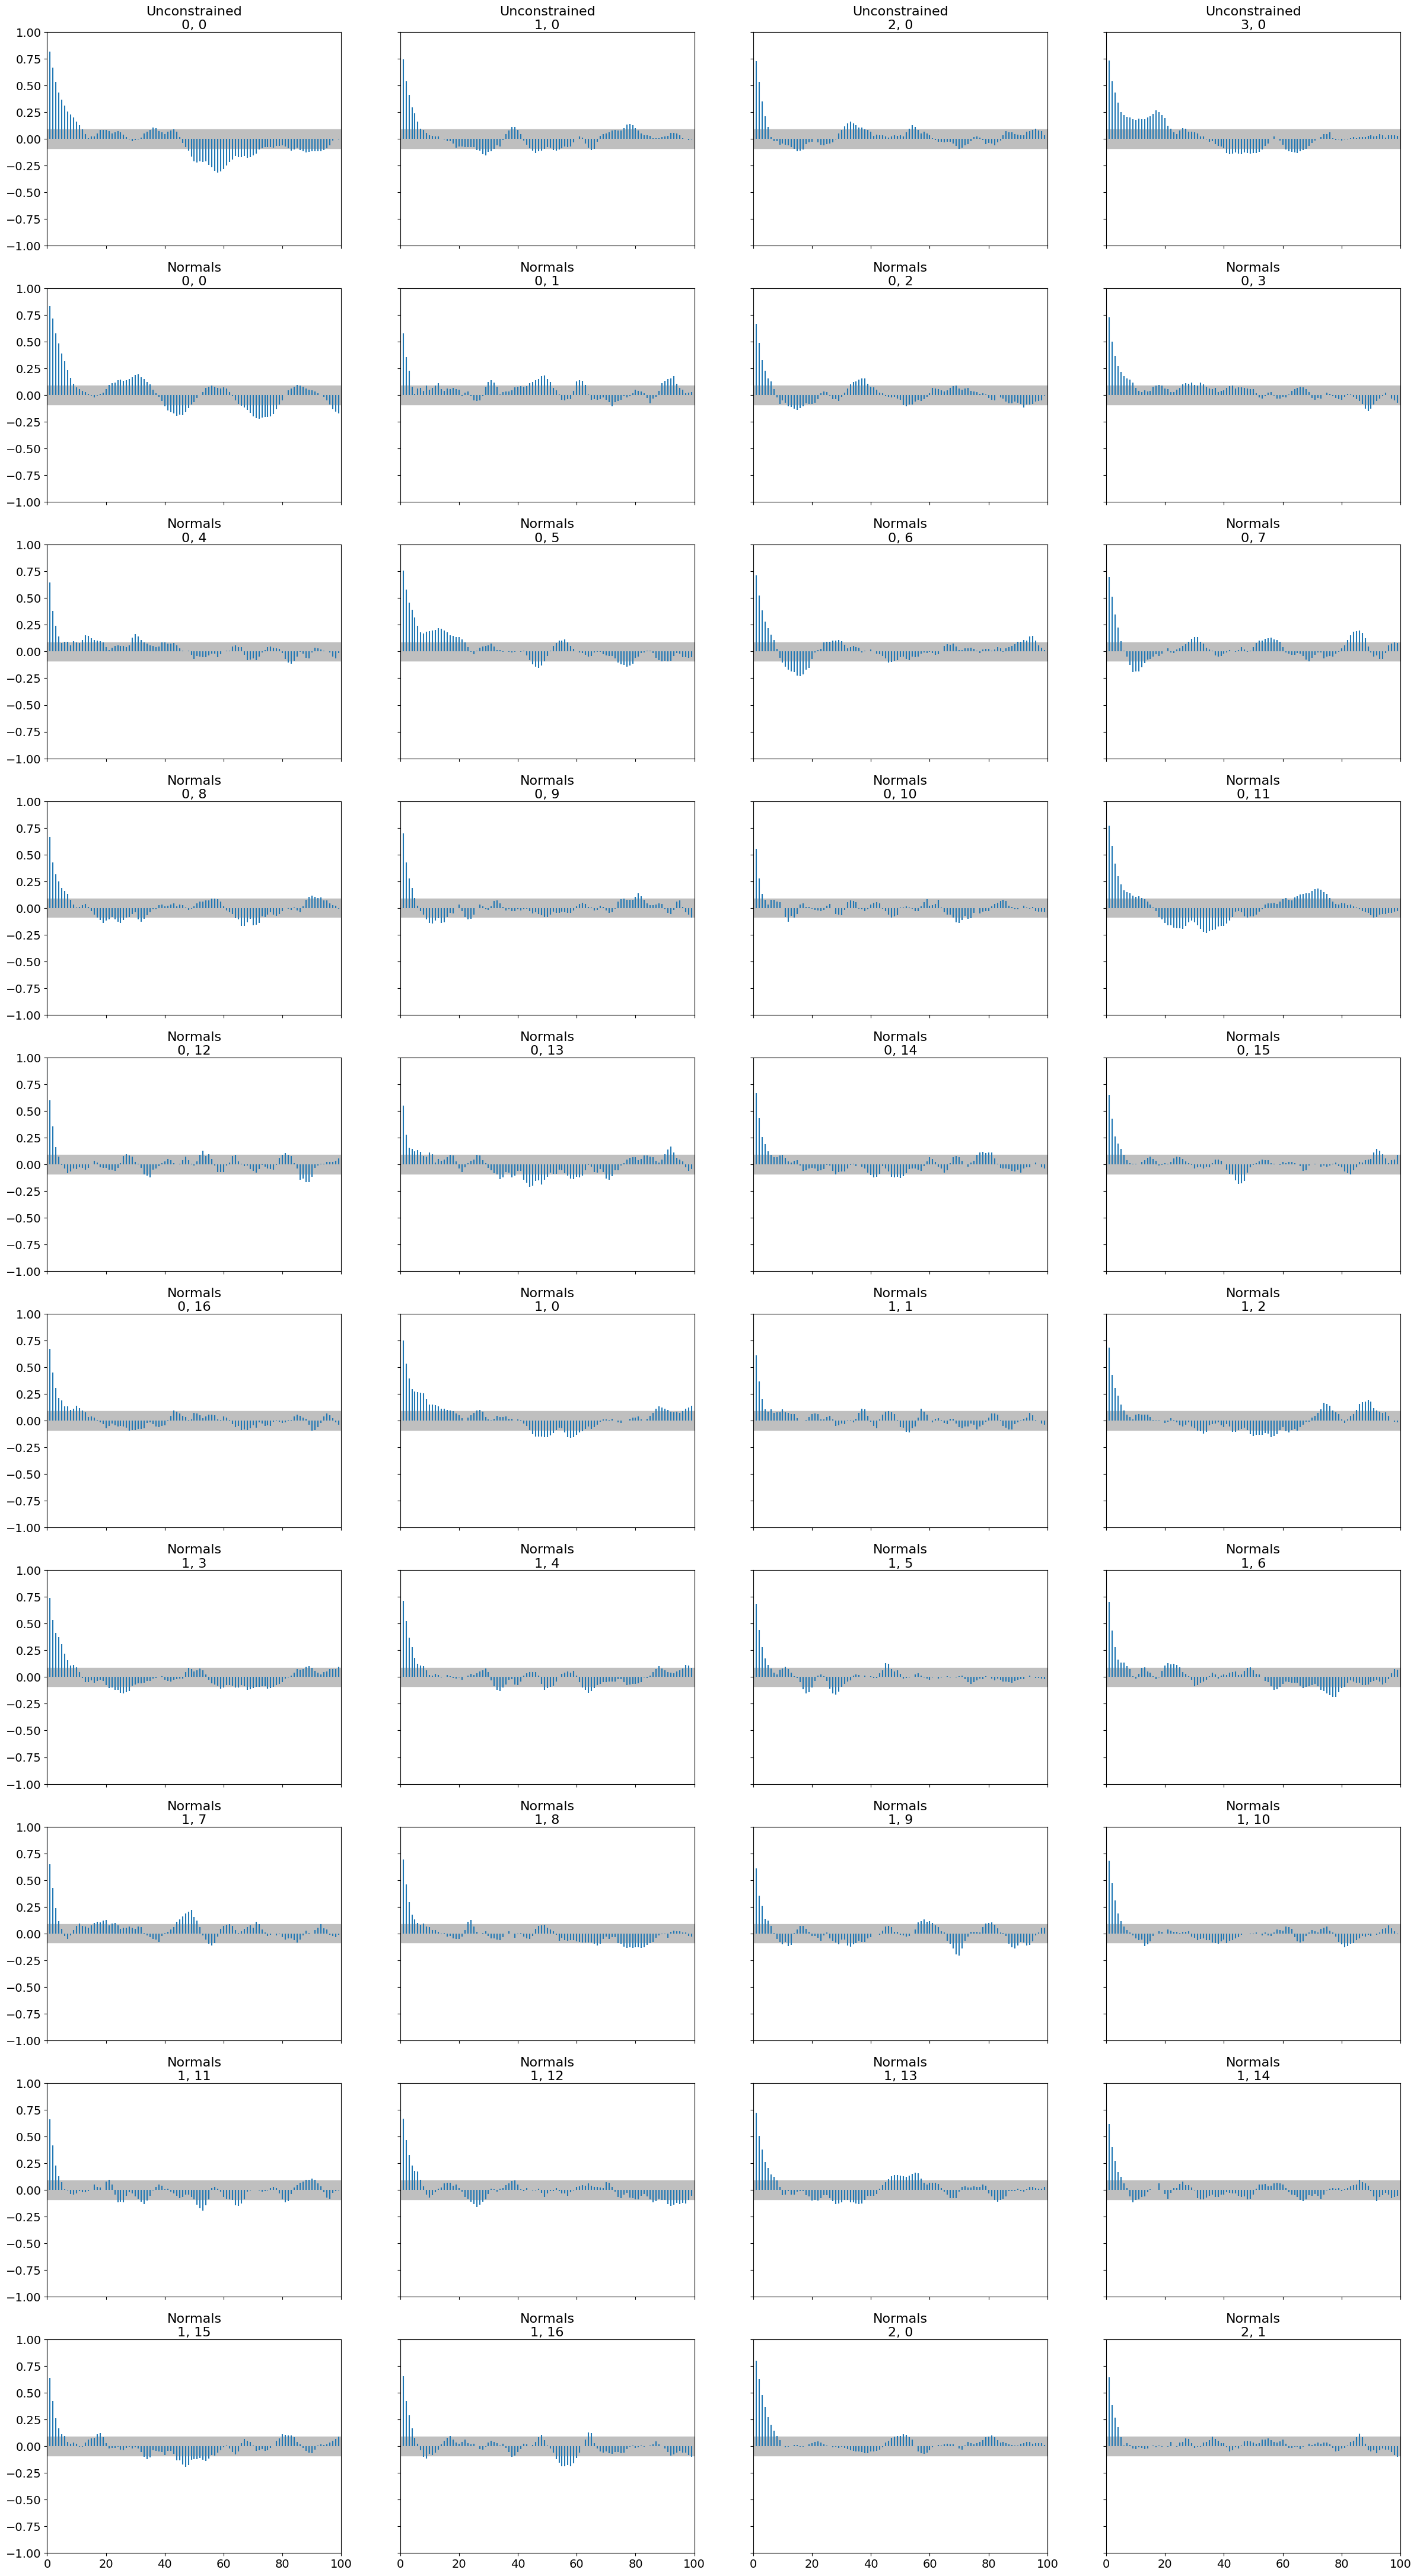

In [22]:
az.plot_trace(post_data)
az.plot_autocorr(post_data)

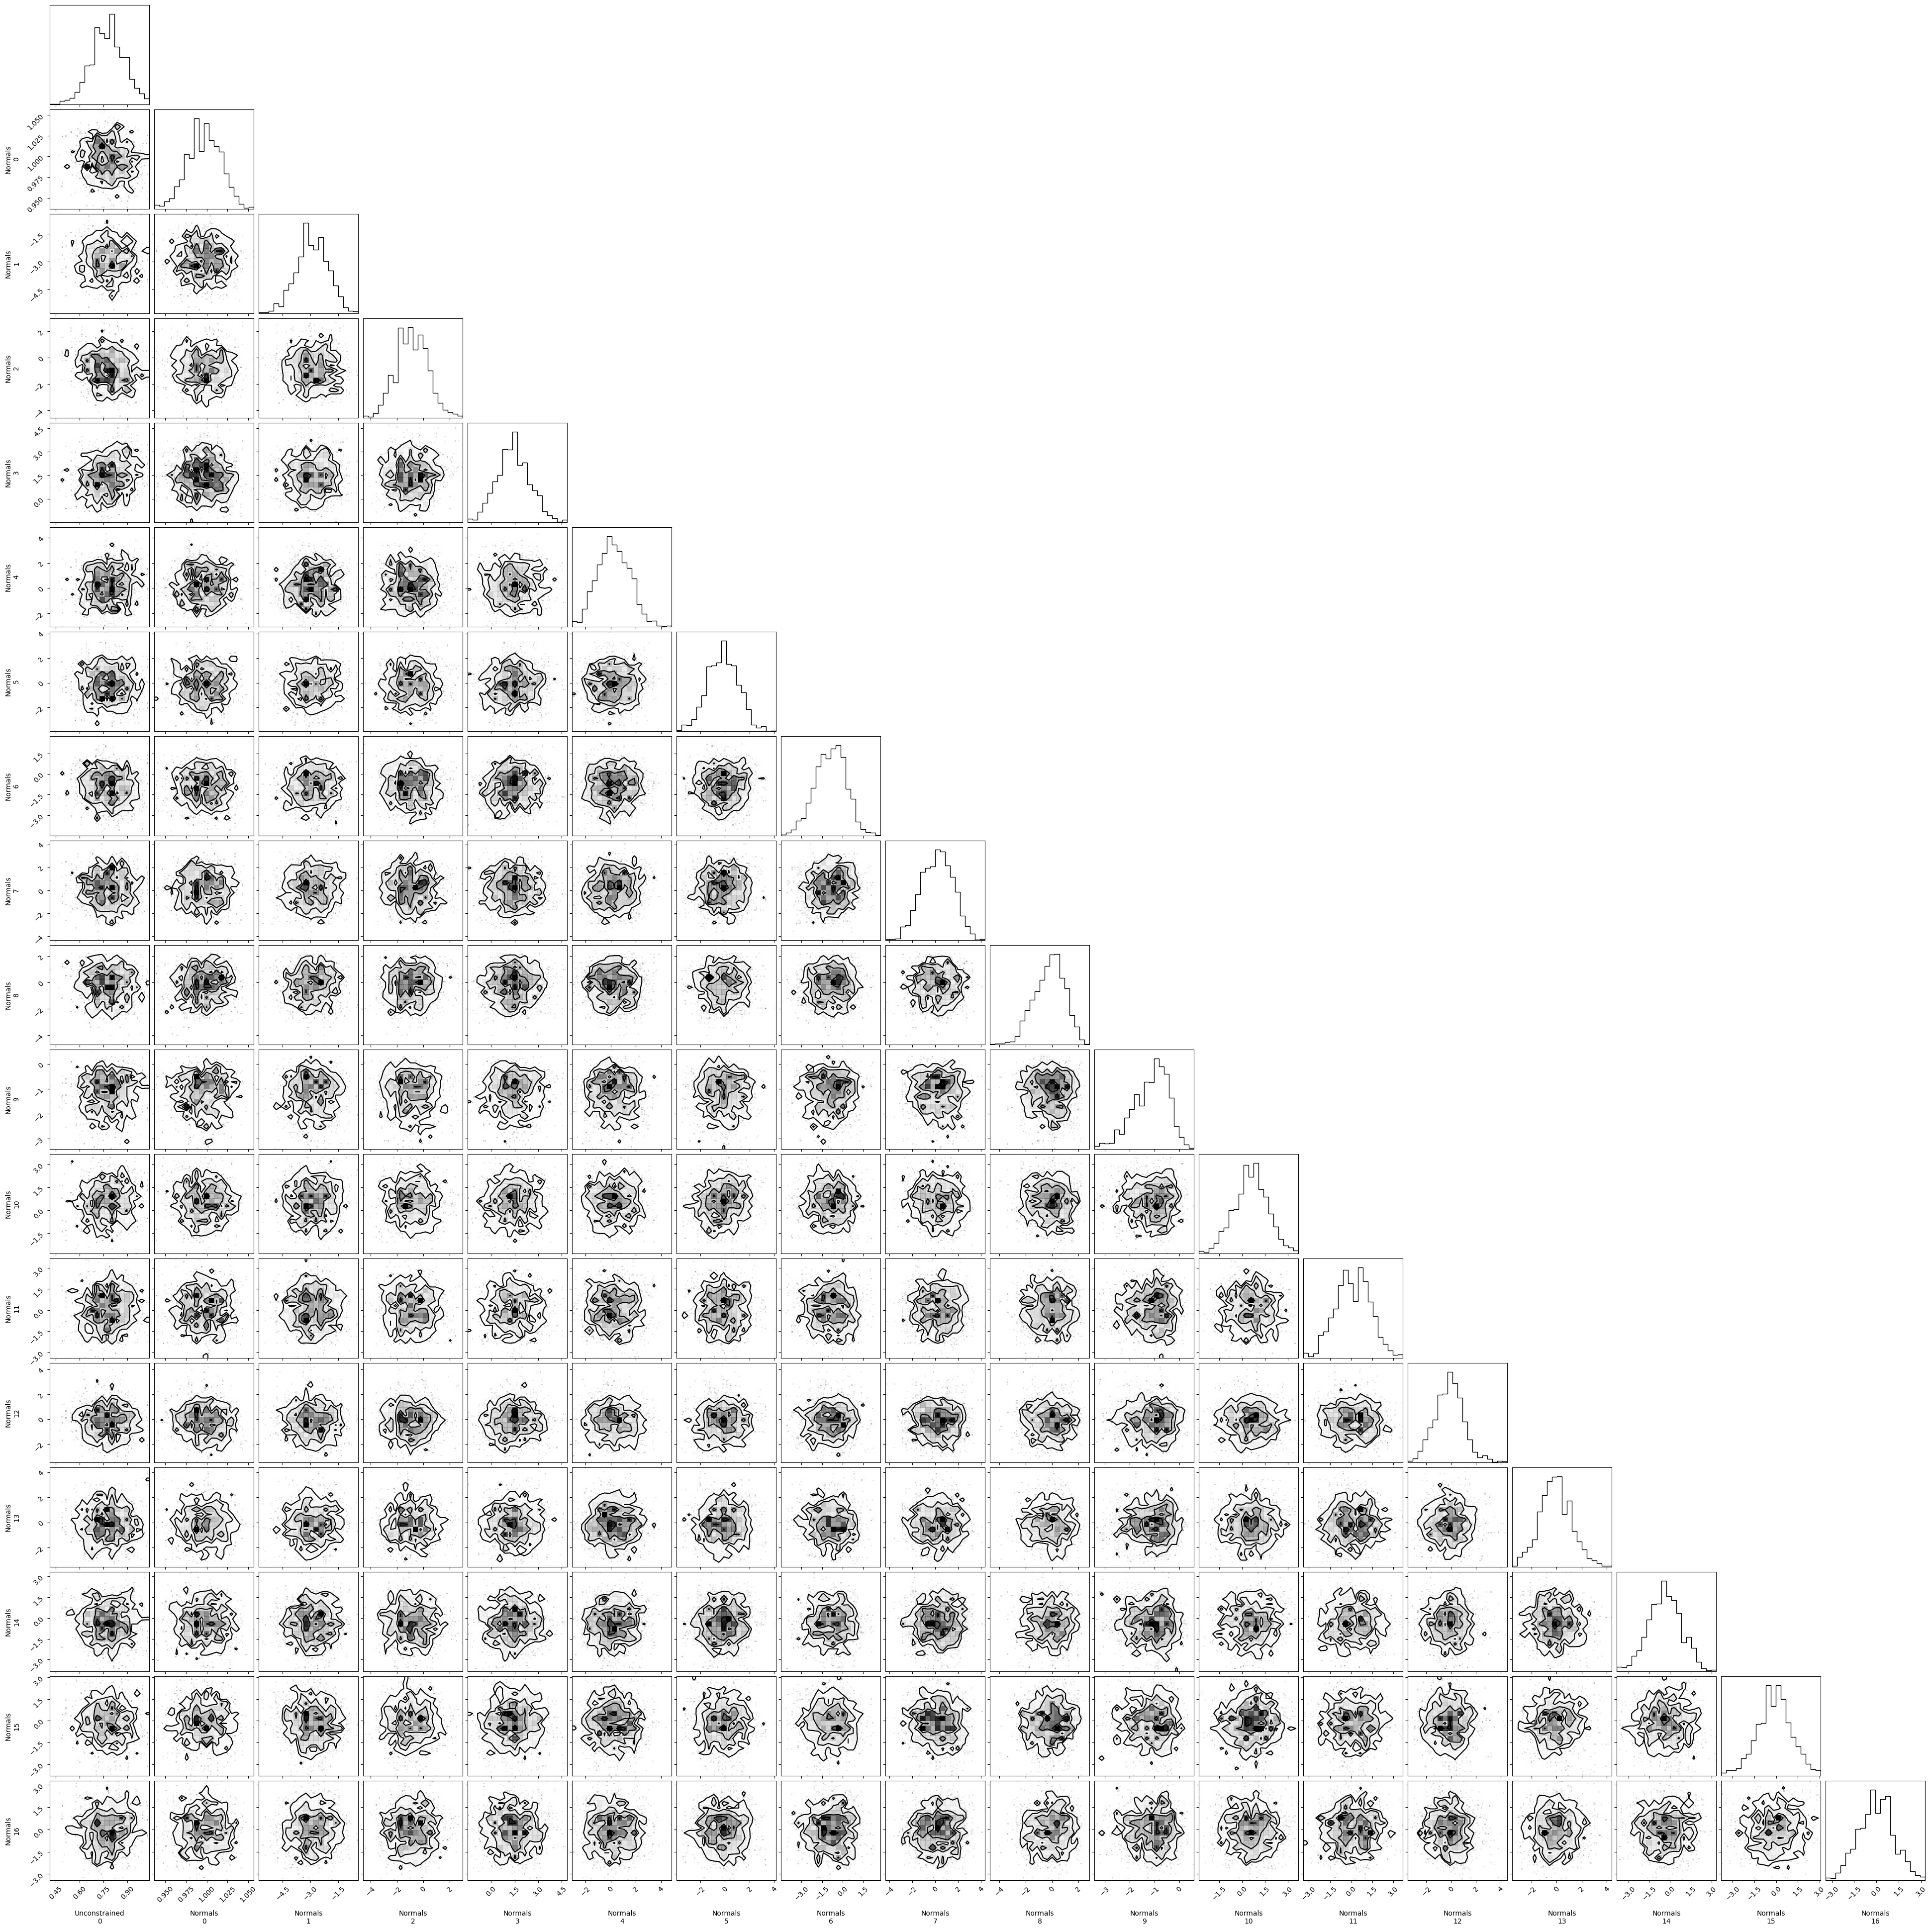

In [14]:
figure = corner.corner(post_data, var_names=None)

In [28]:
post_data

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

# ttbar

In [27]:
post_dataT

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

/Users/malinhorstmann/anaconda3/envs/pyhf_pymc/lib/python3.9/site-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/Users/malinhorstmann/anaconda3/envs/pyhf_pymc/lib/python3.9/site-packages/arviz/plots/plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (528) in plot_autocorr, generating only 40 plots
  warnings.warn(


array([[<AxesSubplot: title={'center': 'Unconstrained\n0, 0'}>,
        <AxesSubplot: title={'center': 'Unconstrained\n1, 0'}>,
        <AxesSubplot: title={'center': 'Unconstrained\n2, 0'}>,
        <AxesSubplot: title={'center': 'Unconstrained\n3, 0'}>],
       [<AxesSubplot: title={'center': 'Normals\n0, 0'}>,
        <AxesSubplot: title={'center': 'Normals\n0, 1'}>,
        <AxesSubplot: title={'center': 'Normals\n0, 2'}>,
        <AxesSubplot: title={'center': 'Normals\n0, 3'}>],
       [<AxesSubplot: title={'center': 'Normals\n0, 4'}>,
        <AxesSubplot: title={'center': 'Normals\n0, 5'}>,
        <AxesSubplot: title={'center': 'Normals\n0, 6'}>,
        <AxesSubplot: title={'center': 'Normals\n0, 7'}>],
       [<AxesSubplot: title={'center': 'Normals\n0, 8'}>,
        <AxesSubplot: title={'center': 'Normals\n0, 9'}>,
        <AxesSubplot: title={'center': 'Normals\n0, 10'}>,
        <AxesSubplot: title={'center': 'Normals\n0, 11'}>],
       [<AxesSubplot: title={'center': 'No

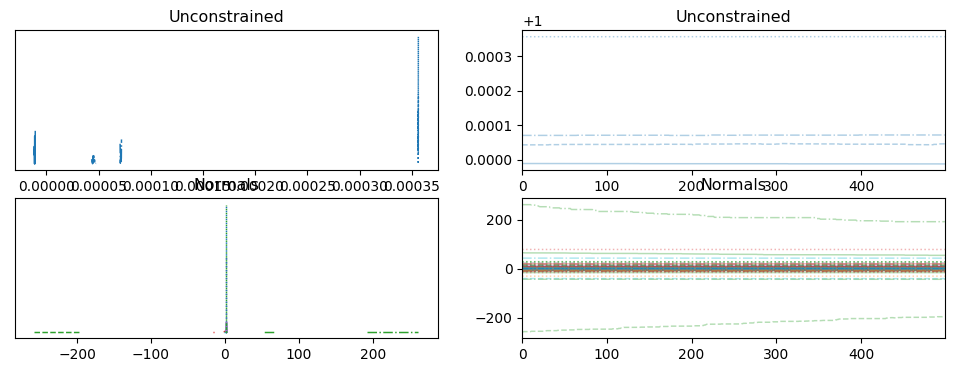

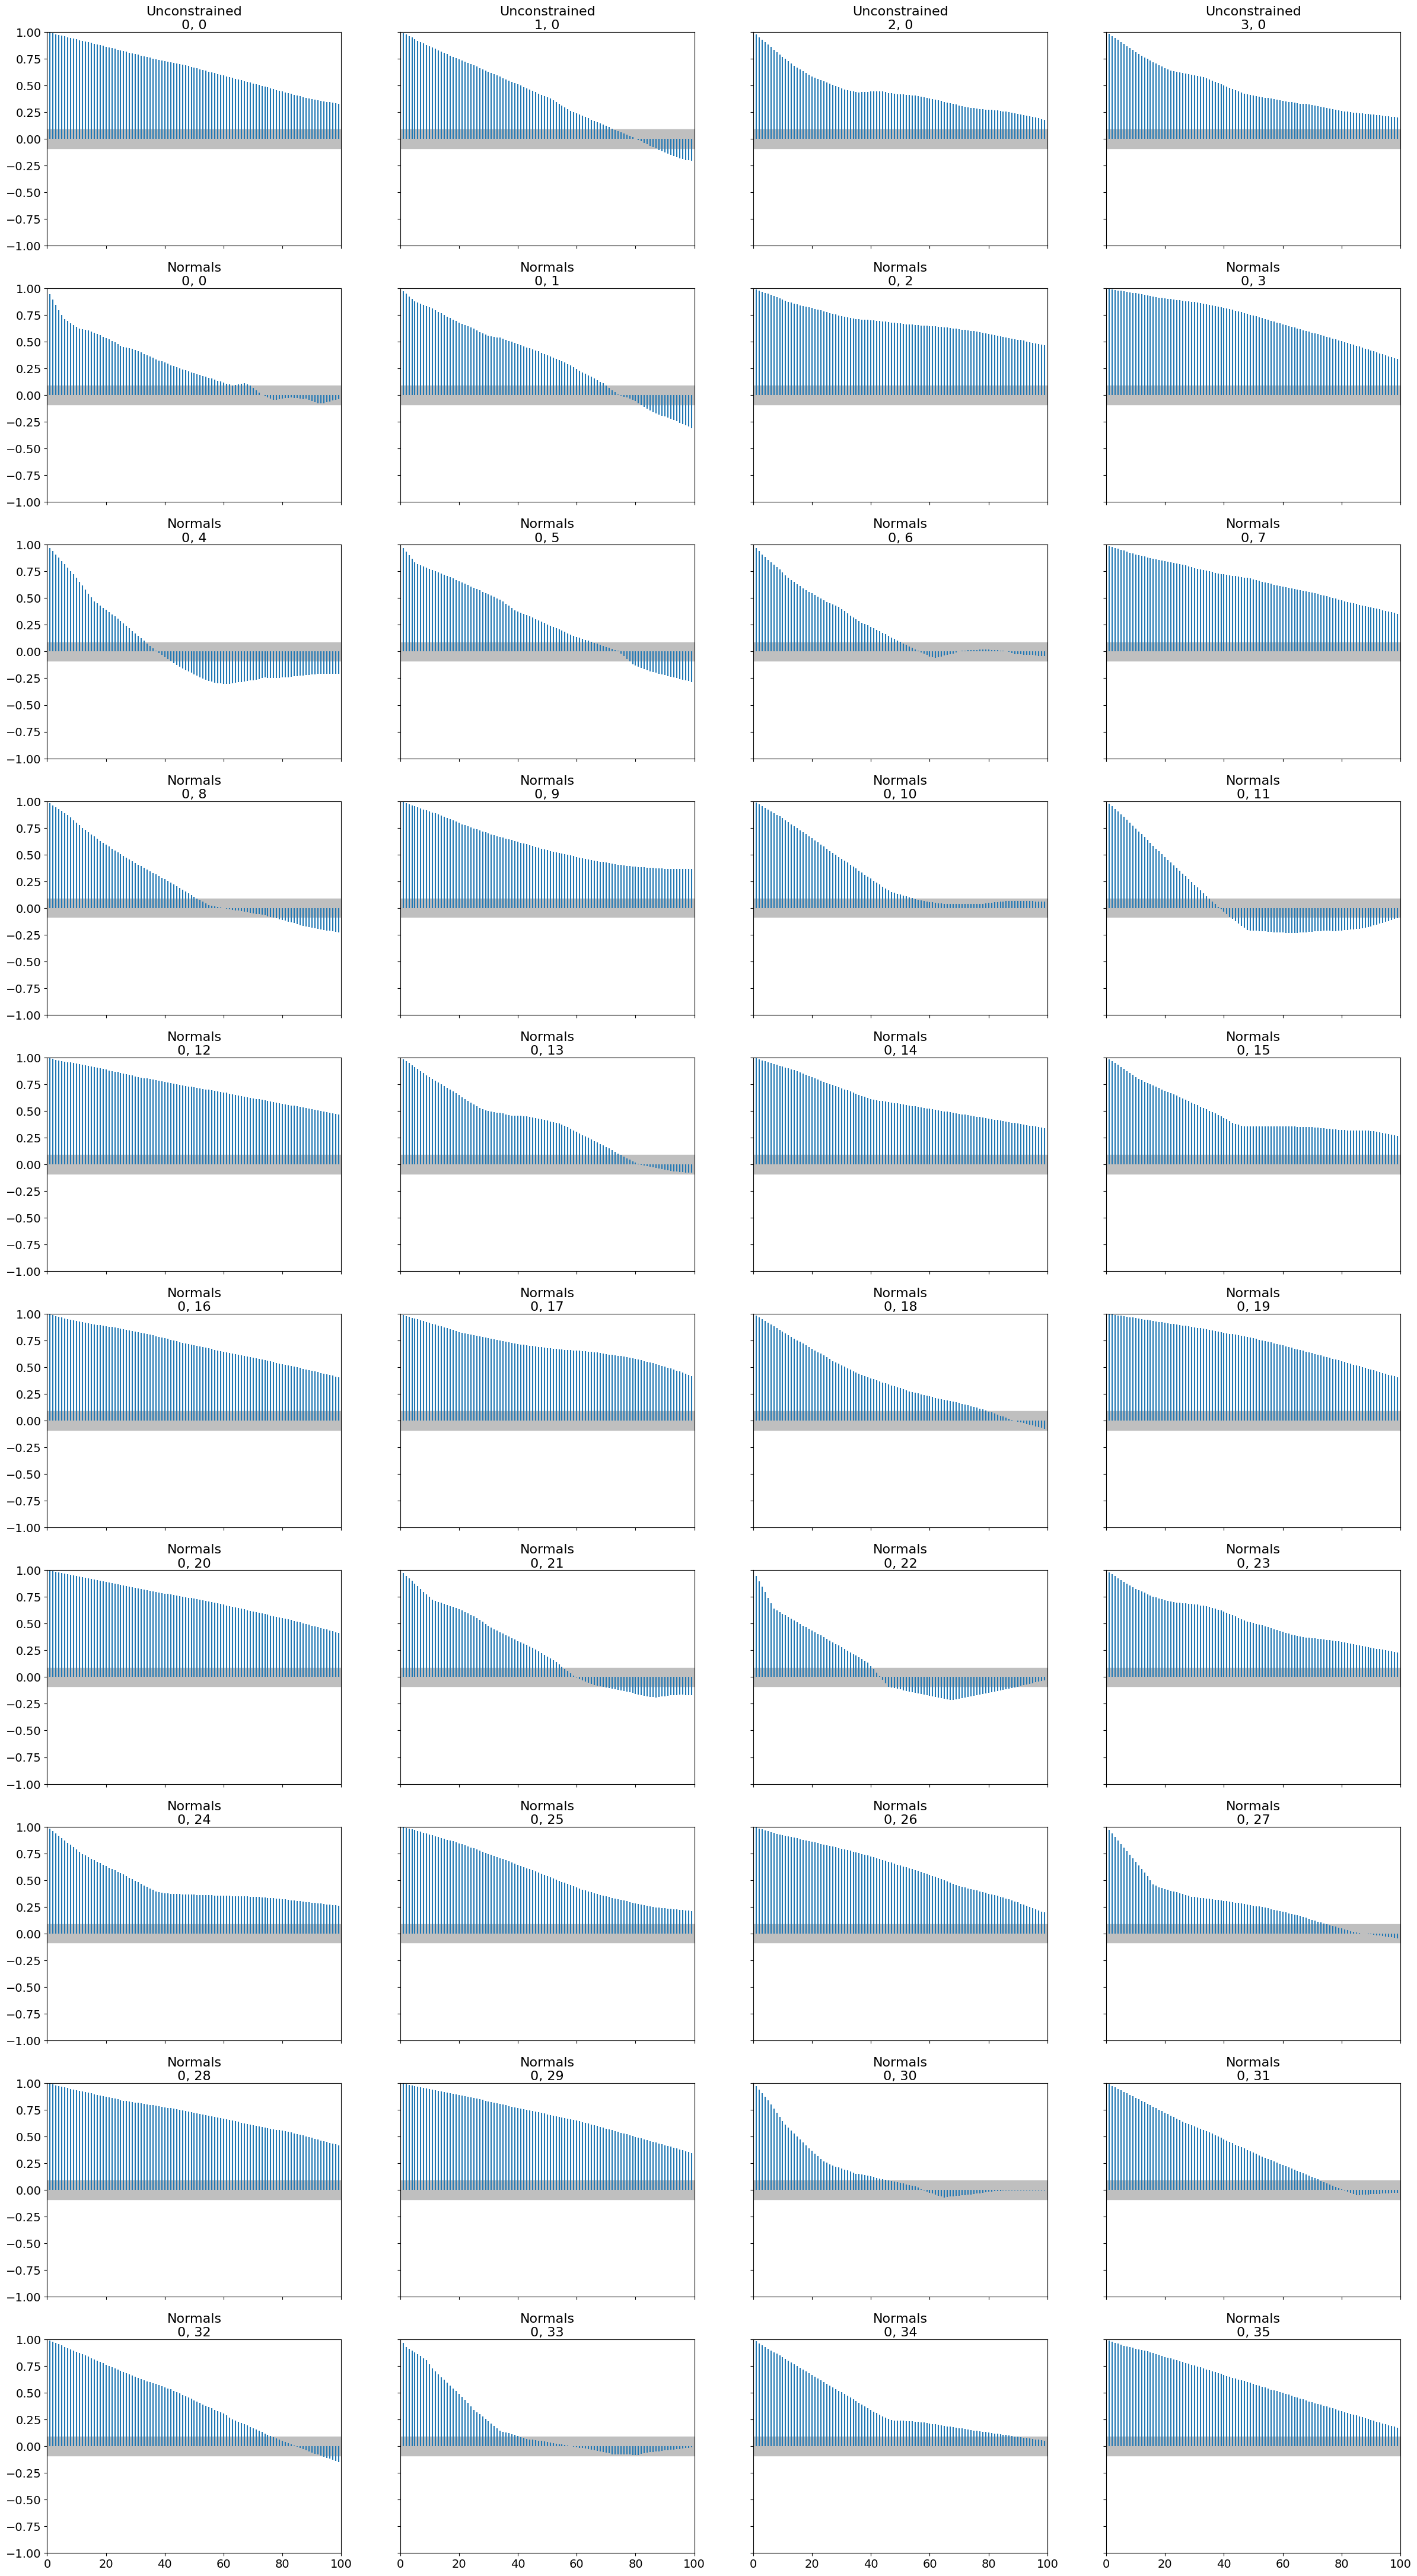

In [26]:
az.plot_trace(post_dataT)
az.plot_autocorr(post_dataT)